# __Collaborative Filtering__

Recommender System is a system that seeks to predict or filter preferences according to the user’s choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general.

Like many machine learning techniques, a recommender system makes prediction based on users’ historical behaviors. Specifically, it’s to predict user preference for a set of items based on past experience. To build a recommender system, the most two popular approaches are Content-based and Collaborative Filtering.

Recommender systems produce a list of recommendations in any of the two ways –


1.    **Collaborative filtering**

Collaborative filtering approaches build a model from user’s past behavior (i.e. items purchased or searched by the user) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that user may have an interest in.

Collaborative Filtering, on the other hand, doesn’t need anything else except users’ historical preference on a set of items. Because it’s based on historical data, the core assumption here is that the users who have agreed in the past tend to also agree in the future. 

2.    **Content-based filtering**

Content-based filtering approaches uses a series of discrete characteristics of an item in order to recommend additional items with similar properties. Content-based filtering methods are totally based on a description of the item and a profile of the user’s preferences. It recommends items based on user’s past preferences.

Content-based approach requires a good amount of information of items’ own features, rather than using users’ interactions and feedbacks. For example, it can be movie attributes such as genre, year, director, actor etc., or textual content of articles that can extracted by applying Natural Language Processing. 

<hr>

### __Disadvantages of Employing content-based filtering__

A few of them are:

-    content-based recommender systems tend to over-specialize. They will recommend items similar to those already consumed, with a tendency to create a “filter bubble”, leaving less possibility for expanding a user’s interests.
-    The issue of limited content analysis: If the content doesn’t contain enough information to discriminate the items precisely, the recommendation will be poor and thus hand-engineered features are required, or tags need to be assigned.

<hr>

### __What is Collaborative Filtering?__

Collaborative filtering (CF) systems work by collecting user feedback in the form of ratings for items in a given domain and exploiting similarities in rating behavior among several users in determining how to recommend an item.

CF accumulates customer product ratings, identifies customers with common ratings, and offers recommendations based on inter-customer comparisons. It’s based on the idea that people who agree in their evaluations of certain items in the past are likely to agree again in the future. For example, most people ask their trusted friends for restaurant or movie suggestions.

Collaborative filtering models are based on an assumption that people like things similar to other things they like, and things that are liked by other people with similar taste.

<hr>

### __Two Major Collaborative Filtering Techniques__

### __1. Memory-based approach:__

This approach is based on taking a matrix of preferences for items by users using this matrix to predict missing preferences and recommend items with high predictions. Simply stated:

``Item-Item Collaborative Filtering: “Users who liked this item also liked …”``

``User-Item Collaborative Filtering: “Users who are similar to you also liked …”``

<img src='https://miro.medium.com/max/700/1*7bFc9R97Z4jKK6J2jaSUlw.jpeg'>

### __2. Model-based approach__

In this approach, CF models are developed using machine learning algorithms to predict a user’s rating of unrated items. Some of these models/techniques include: k-nearest neighbors, clustering, matrix factorization, and deep learning models like autoencoders and using techniques like embeddings as low-dimensional hidden factors for items and users.

<img src='https://miro.medium.com/max/700/1*K5BOY3B93MLn173VVzOW0Q.png'>

<hr>

## **User-Based Collaborative Filtering (UB-CF)**

Imagine that we want to recommend a movie to our friend Stanley. We could assume that similar people will have similar taste. Suppose that me and Stanley have seen the same movies, and we rated them all almost identically. But Stanley hasn’t seen ‘The Godfather: Part II’ and I did. If I love that movie, it sounds logical to think that he will too. With that, we have created an artificial rating based on our similarity.

Well, UB-CF uses that logic and recommends items by finding similar users to the active user (to whom we are trying to recommend a movie). A specific application of this is the user-based Nearest Neighbor algorithm. This algorithm needs two tasks:



1. Find the K-nearest neighbors (KNN) to the user a, using a similarity function w to measure the distance between each pair of users:


2. Predict the rating that user a will give to all items the k neighbors have consumed but a has not. We Look for the item j with the best predicted rating.

In other words, we are creating a User-Item Matrix, predicting the ratings on items the active user has not see, based on the other similar users. This technique is **memory-based**.


### **PROS:**

-    Easy to implement.
-    Context independent.
-    Compared to other techniques, such as content-based, it is more accurate.

### **CONS:**

-    Sparsity: The percentage of people who rate items is really low.
-    Scalability: The more K neighbors we consider (under a certain threshold), the better my classification should be. Nevertheless, the more users there are in the system, the greater the cost of finding the nearest K neighbors will be.
-    Cold-start: New users will have no to little information about them to be compared with other users.
-    New item: Just like the last point, new items will lack of ratings to create a solid ranking (More of this on ‘How to sort and rank items’).

<hr>

### __K-Nearest Neighbors__

The k-nearest neighbors (KNN) algorithm doesn’t make any assumptions on the underlying data distribution, but it relies on item feature similarity. When a KNN makes a prediction about a movie, it will calculate the “distance” (distance metrics will be discussed later) between the target movie and every other movie in its database. It then ranks its distances and returns the top k nearest neighbor movies as the most similar movie recommendations.

<hr>

The standard method of Collaborative Filtering is known as **Nearest Neighborhood** algorithm. There are user-based CF and item-based CF. Let’s first look at **User-based CF**. We have an n × m matrix of ratings, with user uᵢ, i = 1, ...n and item pⱼ, j=1, …m. Now we want to predict the rating rᵢⱼ if target user i did not watch/rate an item j. The process is to calculate the similarities between target user i and all other users, select the top X similar users, and take the weighted average of ratings from these X users with similarities as weights.


While different people may have different baselines when giving ratings, some people tend to give high scores generally, some are pretty strict even though they are satisfied with items. To avoid this bias, we can subtract each user’s average rating of all items when computing weighted average, and add it back for target user, shown as below.


<hr>

### **Two ways to calculate similarity are Pearson Correlation** and **Cosine Similarity**.

Basically, the idea is to find the most similar users to your target user (nearest neighbors) and weight their ratings of an item as the prediction of the rating of this item for target user.

Without knowing anything about items and users themselves, we think two users are similar when they give the same item similar ratings . Analogously, for Item-based CF, we say two items are similar when they received similar ratings from a same user. Then, we will make prediction for a target user on an item by calculating weighted average of ratings on most X similar items from this user. One key advantage of Item-based CF is the stability which is that the ratings on a given item will not change significantly overtime, unlike the tastes of human beings.



There are quite a few limitations of this method. It doesn’t handle sparsity well when no one in the neighborhood rated an item that is what you are trying to predict for target user. Also, it’s not computational efficient as the growth of the number of users and products.

In [1]:
#1. Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


In [2]:
#2. Load dataset (1)

df = pd.read_csv('file.tsv', sep = '\t', names = ['user_id', 'item_id', 'rating', 'time_stamp'])
df

,user_id,item_id,rating,time_stamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [3]:
#1. Load dataset (2)

movie = pd.read_csv('Movie_Id_Titles.csv')
movie.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
#Mengecek movie title dengan item_id tertentu

movie[movie['item_id'] == 50]

,item_id,title
49,50,Star Wars (1977)


__Insight__

In [5]:
#2. Menggabungkan 2 dataset 

data = pd.merge(df, movie, on = 'item_id')
data.head()

,user_id,item_id,rating,time_stamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [6]:
# ekplorasi data by rating

data.groupby('title')['rating'].mean().sort_values(ascending = False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [7]:
# ekplorasi jumlah data by rating 

data.groupby('title')['rating'].count().sort_values(ascending = False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [8]:
# ekplorasi rating per film 

ratings = pd.DataFrame(data.groupby('title')['rating'].mean())

ratings['num_of_ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


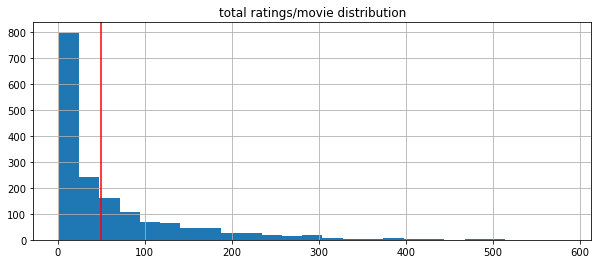

In [9]:
#membuat plot

plt.figure(figsize = (10,4))

ratings['num_of_ratings'].hist(bins = 25)
plt.title('total ratings/movie distribution')
plt.axvline(50, color = 'red')


plt.show()

In [10]:
#mengecek rating yg lebih dari 450 orang

ratings[ratings['num_of_ratings'] >= 450]

,rating,num_of_ratings
title,,
Contact (1997),3.803536,509
"English Patient, The (1996)",3.656965,481
Fargo (1996),4.155512,508
Liar Liar (1997),3.156701,485
Return of the Jedi (1983),4.007890,507
Scream (1996),3.441423,478
Star Wars (1977),4.359589,584
Toy Story (1995),3.878319,452


In [11]:
#mengecek rating yg kurang dari 50 orang

ratings[ratings['num_of_ratings'] < 50]

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
187 (1997),3.024390,41
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5
8 1/2 (1963),3.815789,38
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


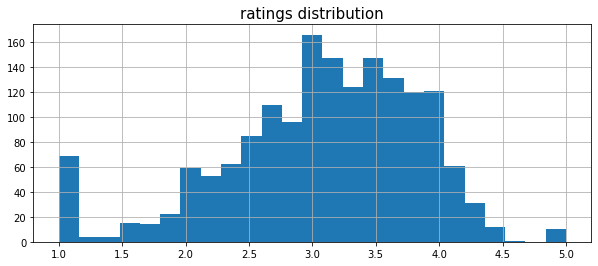

In [12]:
#membuat plot rata2 rating

plt.figure(figsize = (10,4))

ratings['rating'].hist(bins = 25)
plt.title('ratings distribution', size = 15)


plt.show()

Ceritakan tiap insight

In [13]:
#membuat 

moviemat = data.pivot_table(
    index='user_id',
    columns='title',
    values='rating'
).fillna(0)

moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#melihat rating dari movie favorit

liked_movie = 'Star Wars (1977)'

liked_movie_ratings = moviemat[liked_movie]
liked_movie_ratings

user_id
0      5.0
1      5.0
2      5.0
3      0.0
4      5.0
      ... 
939    0.0
940    4.0
941    0.0
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

__PEARSON CORRELATION SIMILARITY__

In [15]:
##pivot by item based

similiar_liked_movie = moviemat.corrwith(liked_movie_ratings)
df_movie_corr = pd.DataFrame(similiar_liked_movie, columns = ['Pearson_Corr'])
df_movie_corr.dropna(inplace = True)
df_movie_corr.sort_values('Pearson_Corr', ascending = False).head(10)

,Pearson_Corr
title,
Star Wars (1977),1.000000
Return of the Jedi (1983),0.746797
"Empire Strikes Back, The (1980)",0.555233
Raiders of the Lost Ark (1981),0.540455
Indiana Jones and the Last Crusade (1989),0.467523
Toy Story (1995),0.456219
"Terminator, The (1984)",0.437866
Back to the Future (1985),0.419493
Alien (1979),0.412516


__NEARESTNEIGHBORS__

In [16]:
#pivot by user based

df_movie_pivot = data.pivot_table(
    index='item_id',
    columns='user_id',
    values='rating'
).fillna(0)

df_movie_pivot

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


__CSR__

In [17]:
#

movie_matrix = csr_matrix(df_movie_pivot.values)
print(movie_matrix)

  (0, 1)	5.0
  (0, 2)	4.0
  (0, 5)	4.0
  (0, 6)	4.0
  (0, 10)	4.0
  (0, 13)	3.0
  (0, 15)	1.0
  (0, 16)	5.0
  (0, 17)	4.0
  (0, 18)	5.0
  (0, 20)	3.0
  (0, 21)	5.0
  (0, 23)	5.0
  (0, 25)	5.0
  (0, 26)	3.0
  (0, 38)	5.0
  (0, 41)	4.0
  (0, 42)	5.0
  (0, 43)	5.0
  (0, 44)	4.0
  (0, 45)	5.0
  (0, 49)	2.0
  (0, 54)	4.0
  (0, 56)	4.0
  (0, 57)	5.0
  :	:
  (1661, 782)	4.0
  (1662, 782)	2.0
  (1663, 782)	4.0
  (1663, 839)	1.0
  (1663, 870)	4.0
  (1663, 880)	4.0
  (1664, 782)	2.0
  (1665, 782)	2.0
  (1666, 782)	3.0
  (1667, 782)	3.0
  (1668, 782)	2.0
  (1669, 782)	3.0
  (1670, 787)	1.0
  (1671, 828)	2.0
  (1671, 896)	2.0
  (1672, 835)	3.0
  (1673, 840)	4.0
  (1674, 851)	3.0
  (1675, 851)	2.0
  (1676, 854)	3.0
  (1677, 863)	1.0
  (1678, 863)	3.0
  (1679, 863)	2.0
  (1680, 896)	3.0
  (1681, 916)	3.0


In [18]:
#Membuat model

model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(movie_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [19]:
#Mencari...

film = 'Batman (1989)'
item_id = int(pd.DataFrame(data['item_id'][data['title'] == film]).iloc[0])

#Menghitung jarak dan index paling dekat dengan film yg ditentukan
distance, idx = model.kneighbors(df_movie_pivot.loc[item_id,:].values.reshape(1,-1), n_neighbors = 6)

#membuat 
num = 1
for j, i in zip(distance[0], idx[0]):
    if j == 0:
        print(f"Rekomendasi untuk film {data[data['item_id'] == item_id]['title'].iloc[0]}")
    else:
        print(f"{num}: Film berjudul {data[data['item_id'] == i]['title'].iloc[0]} dengan distance {j}")
        num +=1

Rekomendasi untuk film Batman (1989)
1: Film berjudul Star Trek IV: The Voyage Home (1986) dengan distance 0.290836250228915
2: Film berjudul Rob Roy (1995) dengan distance 0.3053461989564902
3: Film berjudul Hudsucker Proxy, The (1994) dengan distance 0.3126321455063157
4: Film berjudul Glengarry Glen Ross (1992) dengan distance 0.31983252759281455
5: Film berjudul 101 Dalmatians (1996) dengan distance 0.33024592599604097
